Accuracy: 96.24%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



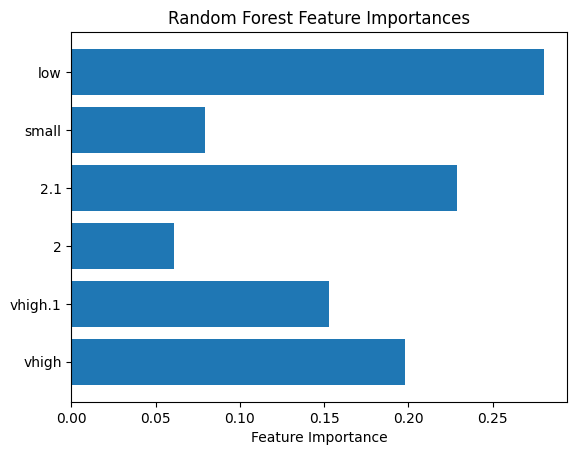

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('car_evaluation.csv')

# Encode categorical features using LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Split the data into features and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target (safety of the car)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot feature importances
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


Sure! I'll explain each line and concept involved in the code step-by-step.

### **Imports and Setup**

```python
import pandas as pd
```
- **pandas** is a library used for data manipulation and analysis. Here, it is used to load and process the dataset (`car_evaluation.csv`) into a DataFrame, which is a two-dimensional labeled data structure (like a table).

```python
from sklearn.preprocessing import LabelEncoder
```
- **LabelEncoder** is a class from `scikit-learn` used to convert categorical values (like strings) into numeric values. This is required because machine learning models work better with numeric data, and many datasets contain categorical features.

```python
from sklearn.model_selection import train_test_split
```
- **train_test_split** is a function from `scikit-learn` that splits the data into two sets: a training set and a test set. The training set is used to train the model, and the test set is used to evaluate its performance.

```python
from sklearn.ensemble import RandomForestClassifier
```
- **RandomForestClassifier** is a machine learning model from the `ensemble` module of `scikit-learn`. It is an ensemble of decision trees used for classification tasks. It works by creating multiple decision trees and combining their results to make more accurate predictions.

```python
from sklearn.metrics import accuracy_score, classification_report
```
- **accuracy_score** is a function used to calculate the accuracy of the model (i.e., how many predictions were correct).
- **classification_report** is a function that provides a detailed report on the classification performance, including precision, recall, and F1 score.

```python
import matplotlib.pyplot as plt
```
- **matplotlib.pyplot** is a plotting library. It is used to visualize the results, such as plotting feature importances in this case.

### **Loading the Dataset**

```python
df = pd.read_csv('car_evaluation.csv')
```
- **pd.read_csv** loads the dataset from a CSV file (`car_evaluation.csv`) into a pandas DataFrame. This DataFrame (`df`) will hold all the data in tabular form, making it easy to manipulate.

### **Encoding Categorical Features**

```python
le = LabelEncoder()
```
- **LabelEncoder** is initialized here. This encoder will be used to transform categorical values (e.g., strings like 'low', 'medium', 'high') into numerical values (e.g., 0, 1, 2).

```python
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])
```
- This loop goes through each column in the dataset that has object data types (i.e., categorical data, such as strings).
- `df[column] = le.fit_transform(df[column])` applies the `LabelEncoder` to each column, converting the categorical values into numerical values.
- The `fit_transform` method learns the unique values in the column and assigns them an integer value.

### **Splitting the Data into Features and Target**

```python
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target (safety of the car)
```
- `X` represents the **features** (input data) of the model. It takes all the columns except the last one (`:-1` slices the DataFrame to select all columns except the last).
- `y` represents the **target variable** (the output), which is typically the column you are trying to predict. Here, we assume the last column of the dataset (`-1`) is the target, which is the safety of the car.

### **Splitting the Data into Training and Testing Sets**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- **train_test_split** splits the data into **training** and **testing** sets.
  - `X_train` and `y_train` are the training features and target values.
  - `X_test` and `y_test` are the testing features and target values.
- `test_size=0.2` means that 20% of the data will be reserved for testing, and 80% will be used for training.
- `random_state=42` ensures that the split is reproducible. This means that each time you run the code with the same dataset, you'll get the same split.

### **Training the Random Forest Classifier**

```python
rf = RandomForestClassifier(n_estimators=100, random_state=42)
```
- **RandomForestClassifier** is initialized with:
  - `n_estimators=100`: This means that the random forest will use 100 decision trees to create the ensemble.
  - `random_state=42`: Ensures reproducibility of the results by fixing the randomness in training the model.

```python
rf.fit(X_train, y_train)
```
- **fit** trains the Random Forest model on the training data (`X_train` and `y_train`). The model learns from this data to make predictions.

### **Making Predictions and Evaluating the Model**

```python
y_pred = rf.predict(X_test)
```
- **predict** is used to make predictions on the test data (`X_test`) based on the trained Random Forest model. The predicted values are stored in `y_pred`.

```python
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
```
- **accuracy_score** compares the true values (`y_test`) with the predicted values (`y_pred`) and calculates the accuracy (the proportion of correct predictions).
- The accuracy is printed in percentage format.

```python
print(classification_report(y_test, y_pred))
```
- **classification_report** generates a detailed performance report, which includes precision, recall, and F1-score for each class (safety of the car). These metrics are important for evaluating the performance of classification models.

### **Visualizing Feature Importances**

```python
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()
```
- **feature_importances_** is an attribute of the trained Random Forest model that indicates the importance of each feature in making predictions.
- `plt.barh` creates a horizontal bar chart showing the importance of each feature. The features are listed on the y-axis, and the importance score on the x-axis.
- `plt.xlabel` and `plt.title` add labels to the plot for clarity.
- `plt.show()` displays the plot.

### **Concepts Explained:**
1. **Random Forest**: A machine learning algorithm that combines many decision trees to improve accuracy and reduce overfitting. Each tree is trained on a random subset of the data, and their predictions are averaged or voted on.
2. **Training and Testing Split**: The dataset is divided into two parts: the training set (used to train the model) and the test set (used to evaluate the model's performance).
3. **Label Encoding**: Converting categorical data into numeric values so the machine learning model can process it.
4. **Accuracy and Classification Report**: Evaluation metrics that show how well the model performs. Accuracy measures overall correctness, while the classification report provides more detailed insights into precision, recall, and F1-score.

Let me know if you need further clarification!

2

In [22]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost = xgb.XGBClassifier(n_estimators=50, random_state=42)

# Voting classifier (for ensemble)
voting_clf = VotingClassifier(estimators=[('ada', ada_boost), ('gbm', gbm), ('xgb', xgboost)], voting='hard')

# Train the models
models = [ada_boost, gbm, xgboost, voting_clf]
model_names = ['AdaBoost', 'GBM', 'XGBoost', 'VotingClassifier']

# Store results
results = {}

# Evaluate each model
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store evaluation metrics
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Save the results to a CSV file
results_df.to_csv('iris_model_comparison.csv')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                  Accuracy  Precision  Recall  F1 Score
AdaBoost               1.0        1.0     1.0       1.0
GBM                    1.0        1.0     1.0       1.0
XGBoost                1.0        1.0     1.0       1.0
VotingClassifier       1.0        1.0     1.0       1.0
